# 🚙 0x - Wheel Calibration

<!--
💻 🚙
-->

In this activity we will calibrate the motor / wheel assemblies of our robots, to ensure that:

1. Duckiebots go (reasonably) straight when commanded to do so, and
2. The wheels do not slip. 

Before getting started, make sure your Duckiebot is powered on and connected to the network. You can verify this by accessing the Dashboard > Robot page and visualizing live statistics, and / or by pinging the Duckiebot from your computer. 

## Motivation

We have derived a model of the Duckiebot's motors and kinematics:

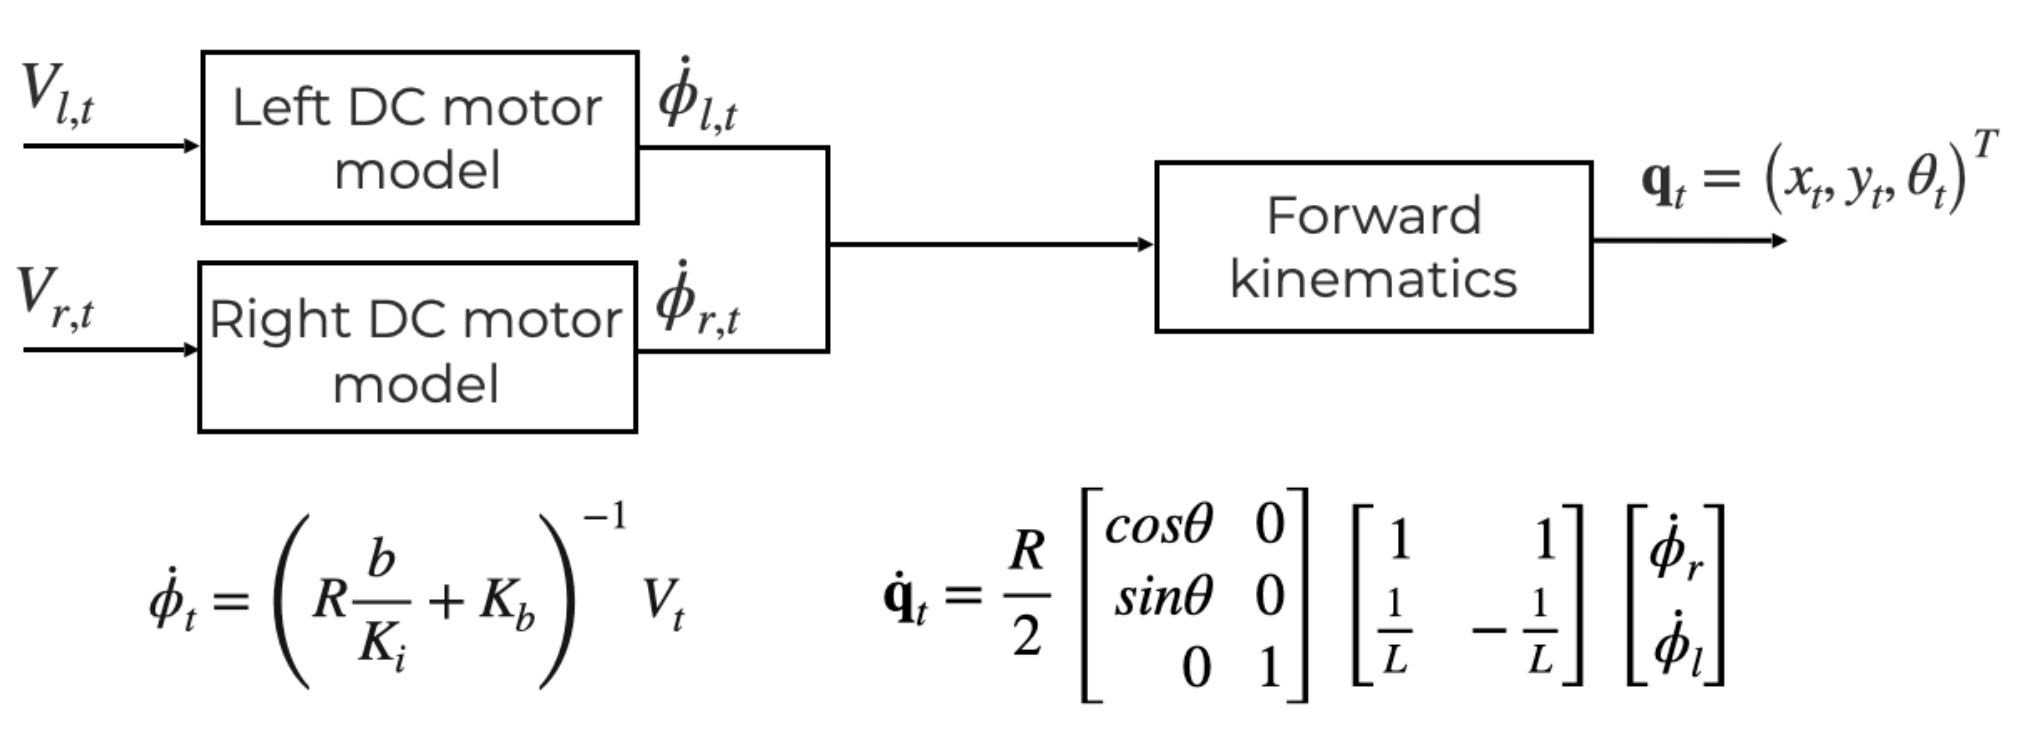

To obtain it, we introduced simplifying assumptions: 

1. The robot is symmetric along the the longitudinal axis;
2. The wheels do not slip.

Unfortunately, neither of these two assumptions really holds in practice. As a result: 

1. The robot will not drive straight when receiving equal commands to the wheels;
2. The wheels (might) slip. 

In this activity we will calibrate the wheels to mitigate these undesired effects.

## Approach

Let's look at the relationship we derived between the voltage provided to each motors and the resulting angular velocity of the wheel:

$$ V_t = \left( R\frac{b}{K_i} + K_b \right) \dot \phi_t $$

The coefficient is a function of the wheel radius and the motor constants, which are difficult to estimate. We therefore lump all terms in a single unknown motor coefficient ($m$). Writing the same for right and left wheels, we get two motor coefficients to estimate: $m_l$ and $m_r$. 

To provide some physical insight, we reparametrize these two unknowns in two physically meaningful quantities, the _gain_ ($g$) and _trim_ ($t$), so that:

$$ V_{r,t} = \left( g + t \right) \dot \phi_{r,t} $$
$$ V_{l,t} = \left( g - t \right) \dot \phi_{l,t} $$

In this way we always have two parameters to find, but we know that increasing (decreasing) the gain will make the robot go faster (slower), while adjusting the trim value will correct asymmetries in the driving. 

## Calibrating the gain ($g$)

The gain parameter can have any value betwen 0 and 1. The default is set as 1. 

The objective of this first section is to determine a value of the gain that works well for your Duckiebot. There isn't a right or wrong number, the best value will vary depending on the desired driving experience. 

As a rule of thumb, we will want to set the gain for our robot to the highest value that _does not make the wheels slip_. 

Note that slippage will depend on the surface you drive your Duckiebot on, so we suggest to calibrate the gain while driving on the Duckietown tiles. 

Before starting the procedure: 

1. Make sure your Duckiebot is powered on and connected to the network,
2. Have your Duckietown built (at least, 3-4 tiles arranged in a straight). 



### Gain calibration procedure

1. Place your powered on Duckiebot on your Duckietown

2. Open a terminal on your computer and type:

       dts exercises test -b ROBOTNAME
    
3. Wait for the instance to finish initializing, then scroll up in the terminal until you find the VNC localhost URL, for example:

    * `INFO:dts: VNC running at http://localhost:8087/`
    
4. Open a browser and navigate to that URL. 

5. Connect to VNC and open, by double-clicking on the desktop icons:
    * the virtual joystick 
    * a terminal
    
6. The default value of the gain is set at 1. You can verify this yourself by either:
    * typing `rosparam get /ROBOTNAME/kinematics_node/gain` in the terminal (and pressing ENTER)
    * Navigating to your Dashboard > File Manager > Calibrations > Kinematics and opening default.yaml
    
7. Select the virtual joystick you previously opened in VNC, and drive your robot on the Duckietown. Bring it on a tour, try all movements (forward, back, left and right turns). Notice if the wheels are slipping. You can set a new value for the gain with:

       rosparam set /ROBOTNAME/kinematics_node/gain gain-value

where `gain-value` is a number bewteen 0 and 1. The lower the number, the slower the robot will go, and the less wheels will slip. 

8. Re-click on the joypad, and bring your Duckiebot on another tour. You shold observe a different behavior consistent with the new gain value.

You can reiterate this process until you find a value that works for you.

#### Saving the new gain value

Make sure to save your new gain! You can do so by typing, always in the same VNC terminal: 

    rosservice call /ROBOTNAME/kinematics_node/save_calibration

#### Final check to make sure it’s stored

You can verify that the new gain value has been saved on your Duckiebot by opening the Dashboard > File Manager > Calibrations > Kinematics page. 

You should find a file named `ROBOTNAME.yaml` in addition to the `default.yaml`. Double click on it and verify that the gain value is indeed the one you chose. 

<!--

#### Curious?

rosparam list /argo/kinematics_node/

-->

## Calibrating the trim ($t$)

This procedure is similar to that of calibrating the gain. 


### Trim calibration procedure 

1. Follow steps 1. to 5. of the Gain calibration procedure.
2. Place your Duckiebot on a lane, as shown below:

<p style="text-align:center;">
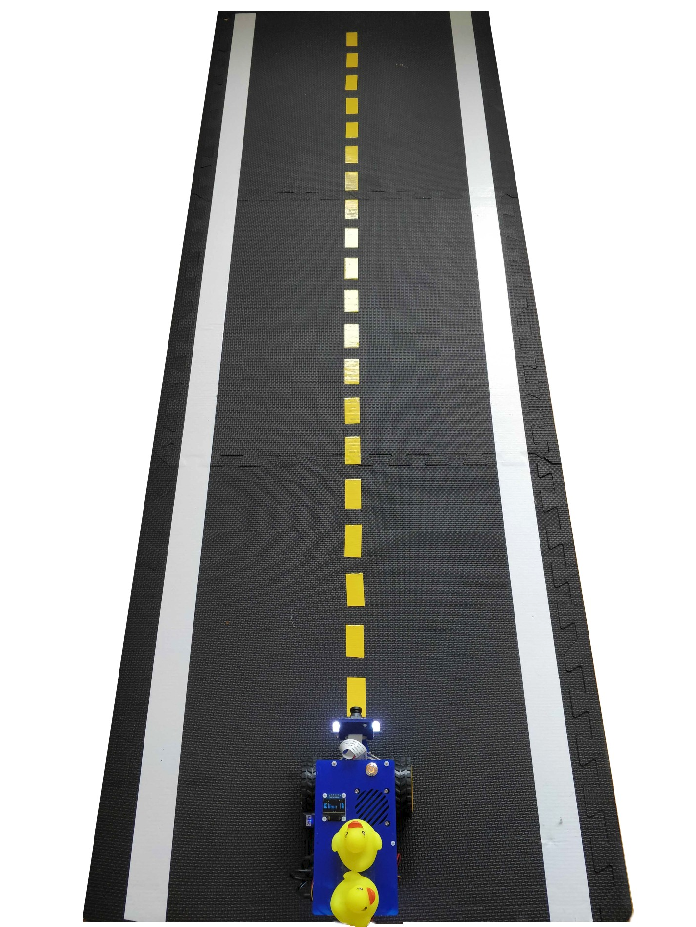
</p>

3. The default value of the trim is 0. The trim can be set between -1 and 1. You can verify your current trim by opening a terminal in VNC and typing: 

       rosparam get /ROBOTNAME/kinematics_node/trim
       
4. Select the virtual joystick (arrow-pad) in VNC and drive straight (press only ⬆️) for roughly 2 meters (3 tiles)

5. Measure how distant the robot ended from the yellow line. If it's more than 10cm, try adjusting your trim:

    * Negative trim: steer towards right
    * Positive trim: steer towards left

6. Iterate the procedure until satisfaction. Note that you will never get a perfect behavior, and perfection is not necessary either, thanks to feedback control!

Note: if you happen to remove the wheels of the Duckiebot for any reason at a later point in time, you might have to re-calibrate your trim value. 

### Saving the new trim value

Similarly to the gain, you want to make sure your new value is saved. You can do so by typing, always in the same VNC terminal you used to set the trim value:

    rosservice call /ROBOTNAME/kinematics_node/save_calibration
    
#### Final check to make sure it’s stored

Exactly as before, you can verify that the new gain value has been saved on your Duckiebot by opening the Dashboard > File Manager > Calibrations > Kinematics page. 

You should find a file named `ROBOTNAME.yaml` in addition to the `default.yaml`. Double click on it and verify that the trim value is indeed the one you chose. 

You are now ready to move on to the wheel encoder tutorial activity. 

<!--

Order of activities:
1. 💻 Representations 
2. 💻 Kinematics
3. 🚙 Wheel calibration (if only manual, if not, switch order with encoder tutorial)
4. 💻 🚙 Encoder tutorial
5. 💻 🚙 Odometry activity
6. 💻 🚙 PID heading control
7. 💻 🚙 Exercise: PID lateral position control. 
-->

TODO: Vincenzo make it work inside VNC and test________________ IGNORE BELOW______________ TO BE TESTED

### Try the automatic trim calibration on the Duckiebot

We can attempt an automatic trim calibration procedure leveraging the data from wheel encoders. 

To get started, we will have to open two terminals on our computer. 


#### Terminal 1

In the first terminal you have to run the exercises with the standard `dts exercises` command:

    dts exercises test --duckiebot_name ROBOTNAME

#### Terminal 2

In the second terminal run:

    docker -H ROBOTNAME.local exec -it ex-mooc-wheels-calibration-agent /bin/bash

In this same terminal, run the interactive trim procedure with:

    python3 /code/solution/src/interaction_pkg/src/interaction_node.py

You will be asked to place your Duckiebot on a lane and drive straight (press only ⬆️) using the virtual joystick in VNC.

Follow the prompt on the terminal, and iterate the procedure until satisfaction.

You can now move on to the wheel encoder tutorial activity. 